# Data Preprocessing

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import USA Covid-19 daily cases
cases = pd.read_csv("covid-19-nyt-data-in-usa_dataset_us-counties.csv")

In [3]:
# Dataframe manipulation
ny_case = cases[cases['county'] == 'New York City']
ny_case = ny_case[["date", "cases", "deaths"]]
ny_case["new_cases"] = ny_case["cases"].diff()
ny_case["new_deaths"] = ny_case["deaths"].diff()
ny_case["date"] = pd.to_datetime(ny_case["date"])
ny_case = ny_case.set_index("date")

In [4]:
# Add new column for estimated new cases based on assumption
est_avg = []
for i in range(0, len(ny_case)):
    avg = int(ny_case["new_cases"][i+4: i+7].sum() / 3)
    est_avg.append(avg)
ny_case["Est_New_Avg"] = est_avg

In [5]:
# Check the dataframe index for concatenation
ny_case.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
               '2020-08-29', '2020-08-30', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03'],
              dtype='datetime64[ns]', name='date', length=187, freq=None)

In [6]:
# Build function for import excel file with multiple sheets
def read_daily_foot(file_name):
    mdf = []
    xls = pd.ExcelFile(file_name)
    sheets = xls.sheet_names[1:]
    for sheet in sheets:
        df = xls.parse(sheet)
        if "NewYork_NY" in df.columns:
            if "Unnamed: 0" in df.columns:
                df = df[["Unnamed: 0", "NewYork_NY"]]
                df = df.rename(columns = {'Unnamed: 0': "Date", "NewYork_NY": sheet})
                df = df.set_index("Date")
            else:
                df = df[["period_end_date", "NewYork_NY"]]
                df = df.rename(columns
                               = {"period_end_date": "Date", "NewYork_NY": sheet})
                df = df.set_index("Date")
        elif "New York, NY" in df.columns:
            if "Unnamed: 0" in df.columns:
                df = df[["Unnamed: 0", "New York, NY"]]
                df = df.rename(columns = {'Unnamed: 0': "Date", "New York, NY": sheet})
                df = df.set_index("Date")
            else:
                df = df[["period_end_date", "New York, NY"]]
                df = df.rename(columns = {"period_end_date": "Date", "New York, NY": sheet})
                df = df.set_index("Date")
        else: continue
        mdf.append(df)
    mdf_full = pd.concat(mdf, axis = 1)
    return mdf_full

In [7]:
# Import foot traffic index dataset
ny_foot = read_daily_foot("Foursquare COVID-19 Data National + DMA_August 28 2020.xlsx")

In [8]:
# Check the dataframe index for concatenation
ny_foot.index

DatetimeIndex(['2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', name='Date', length=192, freq=None)

In [9]:
# Concatenate two data frames
df_full = pd.concat([ny_foot, ny_case], axis = 1)

In [10]:
# Overview
df_full

,Airports,Auto Dealerships,Auto Shops,Banks,Bars,Big Box Stores,Casual Dining Chains,Clothing Stores,Convenience Store,Drugstores & Pharmacies,...,Offices,Parks,SalonsBarbershops,Shopping Malls,Warehouse Stores,cases,deaths,new_cases,new_deaths,Est_New_Avg
2020-02-19,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
2020-02-20,99.216937,101.537734,102.911445,100.651115,100.494899,97.515130,101.048893,99.895102,98.383975,95.682394,...,100.234218,100.683753,99.864966,99.425226,100.679541,NaN,NaN,NaN,NaN,NaN
2020-02-21,97.791647,101.145251,102.544368,100.028844,99.951286,96.637564,97.998888,98.316327,96.613487,91.061693,...,100.469466,100.618896,99.021596,97.826082,101.014044,NaN,NaN,NaN,NaN,NaN
2020-02-22,97.220516,101.800570,104.201530,99.703192,101.868420,96.305710,98.426706,98.313729,96.979995,90.981903,...,100.813226,106.667514,100.386059,97.920114,101.688897,NaN,NaN,NaN,NaN,NaN
2020-02-23,97.881546,102.093817,105.076011,99.513264,100.737782,95.810347,95.934193,96.916304,96.852843,90.999409,...,100.481091,113.754121,100.521196,96.292801,103.625405,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,238677.0,23689.0,292.0,6.0,101.0
2020-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,238938.0,23695.0,261.0,6.0,0.0
2020-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,239246.0,23703.0,308.0,8.0,0.0
2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,239512.0,23708.0,266.0,5.0,0.0


In [11]:
# Slicing data set with date
df_full = df_full.loc["2020-03-01":"2020-08-28", :]

In [12]:
# Check the index
df_full.index

DatetimeIndex(['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
               '2020-03-09', '2020-03-10',
               ...
               '2020-08-19', '2020-08-20', '2020-08-21', '2020-08-22',
               '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', length=181, freq='D')

In [13]:
# Overview
df_full

,Airports,Auto Dealerships,Auto Shops,Banks,Bars,Big Box Stores,Casual Dining Chains,Clothing Stores,Convenience Store,Drugstores & Pharmacies,...,Offices,Parks,SalonsBarbershops,Shopping Malls,Warehouse Stores,cases,deaths,new_cases,new_deaths,Est_New_Avg
2020-03-01,90.791740,97.409488,97.478867,105.669195,95.976626,96.523529,89.540562,87.950744,98.935264,94.090080,...,106.125765,96.128252,101.746284,89.762834,109.537422,1.0,0.0,NaN,NaN,3.0
2020-03-02,89.941396,97.167000,97.273984,107.228749,96.190763,97.343130,89.284209,87.741612,99.102419,95.448289,...,106.002316,96.108230,102.348239,90.226711,112.456294,1.0,0.0,0.0,0.0,3.0
2020-03-03,89.608717,96.999234,97.962018,110.664355,96.685959,97.914770,88.317578,88.034404,100.330795,97.384340,...,105.964207,97.385028,102.950368,90.624030,114.599371,2.0,0.0,1.0,0.0,5.0
2020-03-04,89.152712,96.640478,99.602205,112.932567,97.587344,99.223988,89.155589,89.553038,101.332914,98.914721,...,106.223904,100.233236,103.787239,91.229204,117.637035,2.0,0.0,0.0,0.0,8.0
2020-03-05,88.901600,95.165553,99.760367,114.930077,98.247097,100.448865,89.578883,88.696391,102.216572,100.028933,...,105.792874,103.219014,104.318222,91.220708,119.926726,4.0,0.0,2.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,27.920222,NaN,111.016329,88.984216,78.579708,92.658367,NaN,65.481480,96.146863,82.067964,...,66.738736,171.314665,87.783665,64.247303,101.254219,237032.0,23662.0,210.0,4.0,279.0
2020-08-25,27.544634,NaN,111.473566,87.936449,77.271155,92.898362,NaN,64.935096,95.839400,81.118069,...,66.449545,167.435183,87.939990,64.179434,101.773196,237263.0,23666.0,231.0,4.0,277.0
2020-08-26,27.944077,NaN,112.708000,89.499942,78.681614,92.738183,NaN,65.623716,97.147724,82.448797,...,67.426334,173.409368,89.784139,64.381243,102.270445,237525.0,23669.0,262.0,3.0,287.0
2020-08-27,28.848176,NaN,112.804036,90.324009,77.602084,92.651495,NaN,66.819108,98.359062,82.507654,...,67.758622,170.157423,90.610652,64.265610,102.808233,237838.0,23674.0,313.0,5.0,278.0


In [14]:
# drop unnecessary attributes
df_final = df_full.dropna(axis = 1, how = "any")
df_final = df_final.reset_index()
df_final = df_final.drop(["index", "deaths"], axis = 1)

In [15]:
# Overview the preprocessed data frame
df_final

,Airports,Auto Shops,Banks,Bars,Big Box Stores,Clothing Stores,Convenience Store,Drugstores & Pharmacies,Discount Stores,Fast Food,...,Hardware Stores,Hotels,Liquor Stores,Offices,Parks,SalonsBarbershops,Shopping Malls,Warehouse Stores,cases,Est_New_Avg
0,90.791740,97.478867,105.669195,95.976626,96.523529,87.950744,98.935264,94.090080,90.992219,100.870675,...,103.048999,91.389190,98.427002,106.125765,96.128252,101.746284,89.762834,109.537422,1.0,3.0
1,89.941396,97.273984,107.228749,96.190763,97.343130,87.741612,99.102419,95.448289,91.584790,101.048464,...,104.175283,91.267857,98.512465,106.002316,96.108230,102.348239,90.226711,112.456294,1.0,3.0
2,89.608717,97.962018,110.664355,96.685959,97.914770,88.034404,100.330795,97.384340,92.646447,101.584151,...,104.504879,90.715985,99.141313,105.964207,97.385028,102.950368,90.624030,114.599371,2.0,5.0
3,89.152712,99.602205,112.932567,97.587344,99.223988,89.553038,101.332914,98.914721,94.567369,102.714372,...,105.364296,91.068811,99.853099,106.223904,100.233236,103.787239,91.229204,117.637035,2.0,8.0
4,88.901600,99.760367,114.930077,98.247097,100.448865,88.696391,102.216572,100.028933,97.633527,103.856447,...,106.269953,90.958265,100.627920,105.792874,103.219014,104.318222,91.220708,119.926726,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,27.920222,111.016329,88.984216,78.579708,92.658367,65.481480,96.146863,82.067964,79.993892,91.529161,...,134.483146,72.539435,111.068560,66.738736,171.314665,87.783665,64.247303,101.254219,237032.0,279.0
177,27.544634,111.473566,87.936449,77.271155,92.898362,64.935096,95.839400,81.118069,79.561355,91.003407,...,135.087662,72.566934,110.468867,66.449545,167.435183,87.939990,64.179434,101.773196,237263.0,277.0
178,27.944077,112.708000,89.499942,78.681614,92.738183,65.623716,97.147724,82.448797,80.499379,92.388958,...,135.924416,74.334682,111.681905,67.426334,173.409368,89.784139,64.381243,102.270445,237525.0,287.0
179,28.848176,112.804036,90.324009,77.602084,92.651495,66.819108,98.359062,82.507654,81.238952,92.851531,...,136.756176,74.325612,113.011813,67.758622,170.157423,90.610652,64.265610,102.808233,237838.0,278.0


# Functions for Fetch and Manuplating Data

In [16]:
# Build function for import and manuplating daily cases data
def read_daily_cases(file_name):
    cases = pd.read_csv(file_name)
    ny_case = cases[cases['county'] == 'New York City']
    ny_case = ny_case[["date", "cases", "deaths"]]
    ny_case["new_cases"] = ny_case["cases"].diff()
    ny_case["new_deaths"] = ny_case["deaths"].diff()
    ny_case["date"] = pd.to_datetime(ny_case["date"])
    ny_case = ny_case.set_index("date")
    est_avg = []
    for i in range(0, len(ny_case)):
        avg = int(ny_case["new_cases"][i+4: i+7].sum() / 3)
        est_avg.append(avg)
    ny_case["Est_New_Avg"] = est_avg
    return ny_case

# Build function for import and manuplating daily foot data
def read_daily_foot(file_name):
    mdf = []
    xls = pd.ExcelFile(file_name)
    sheets = xls.sheet_names[1:]
    for sheet in sheets:
        df = xls.parse(sheet)
        if "NewYork_NY" in df.columns:
            if "Unnamed: 0" in df.columns:
                df = df[["Unnamed: 0", "NewYork_NY"]]
                df = df.rename(columns = {'Unnamed: 0': "Date", "NewYork_NY": sheet})
                df = df.set_index("Date")
            else:
                df = df[["period_end_date", "NewYork_NY"]]
                df = df.rename(columns
                               = {"period_end_date": "Date", "NewYork_NY": sheet})
                df = df.set_index("Date")
        elif "New York, NY" in df.columns:
            if "Unnamed: 0" in df.columns:
                df = df[["Unnamed: 0", "New York, NY"]]
                df = df.rename(columns = {'Unnamed: 0': "Date", "New York, NY": sheet})
                df = df.set_index("Date")
            else:
                df = df[["period_end_date", "New York, NY"]]
                df = df.rename(columns = {"period_end_date": "Date", "New York, NY": sheet})
                df = df.set_index("Date")
        else: continue
        mdf.append(df)
    mdf_full = pd.concat(mdf, axis = 1)
    return mdf_full

# Function for concatenating 
def final_df(case_file, foot_file):
    ny_case = read_daily_cases(case_file)
    ny_foot = read_daily_foot(foot_file)
    df_final = pd.concat([ny_foot, ny_case], axis = 1).loc["2020-03-01":"2020-08-28", :]
    df_final = df_full.dropna(axis = 1, how = "any")
    df_final = df_final.reset_index()
    df_final = df_final.drop(["index", "deaths"], axis = 1)
    return df_final

# Create Testset

In [17]:
# Random Sampling
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_final, test_size = 0.2, random_state = 42)

# Exploratory Data Analysis - Based on Stratified Train Dataset

In [18]:
# Initializing dataset
df = train_set.copy()

In [19]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 65 to 102
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Airports                 144 non-null    float64
 1   Auto Shops               144 non-null    float64
 2   Banks                    144 non-null    float64
 3   Bars                     144 non-null    float64
 4   Big Box Stores           144 non-null    float64
 5   Clothing Stores          144 non-null    float64
 6   Convenience Store        144 non-null    float64
 7   Drugstores & Pharmacies  144 non-null    float64
 8   Discount Stores          144 non-null    float64
 9   Fast Food                144 non-null    float64
 10  Gas Stations             144 non-null    float64
 11  Grocery Stores           144 non-null    float64
 12  Gyms                     144 non-null    float64
 13  Hardware Stores          144 non-null    float64
 14  Hotels                   

In [20]:
# Describtive Statistics
df.describe()

,Airports,Auto Shops,Banks,Bars,Big Box Stores,Clothing Stores,Convenience Store,Drugstores & Pharmacies,Discount Stores,Fast Food,...,Hardware Stores,Hotels,Liquor Stores,Offices,Parks,SalonsBarbershops,Shopping Malls,Warehouse Stores,cases,Est_New_Avg
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,26.741056,96.110999,88.522019,60.589871,94.464957,43.703785,92.826416,85.628853,81.869775,89.443258,...,144.654456,54.548229,110.800383,58.380451,148.262530,75.139588,52.456672,105.812979,165558.687500,1284.888889
std,20.318094,13.368702,8.242270,17.666952,5.047343,23.489230,5.703361,8.834025,7.616579,6.766358,...,25.941519,17.614561,6.058170,16.266907,25.873594,15.094964,16.686225,10.305031,82241.437473,1652.059021
min,11.902774,67.305979,72.095994,36.180840,82.927161,17.330070,81.944813,75.576012,71.612692,73.510462,...,103.048999,30.525922,94.814385,40.637644,96.108230,52.584053,33.315605,85.295215,1.000000,3.000000
25%,14.396097,90.434241,84.197094,45.382188,90.984315,20.916714,88.690687,80.400668,77.672650,86.373392,...,125.618542,39.555404,107.204588,47.694575,125.518337,62.603309,37.639521,100.487989,123375.250000,289.250000
50%,20.833587,99.913041,87.607927,61.328371,93.702272,36.962320,93.123690,82.342080,79.413349,89.612112,...,136.978493,52.949415,111.126752,56.225466,157.953434,75.994728,50.485012,103.225136,207169.500000,388.500000
75%,25.842082,106.192500,90.422089,72.783224,97.177790,63.095511,96.119660,89.215030,82.387944,92.293875,...,166.730022,66.717777,114.812983,60.208694,167.734880,86.940539,63.538039,108.482910,224385.250000,1556.500000
max,90.791740,115.020469,114.930077,100.050190,113.627275,89.553038,108.852692,120.497868,109.900378,108.585250,...,197.289483,92.254863,129.728817,106.223904,192.189577,104.318222,91.229204,151.372063,238107.000000,5790.000000


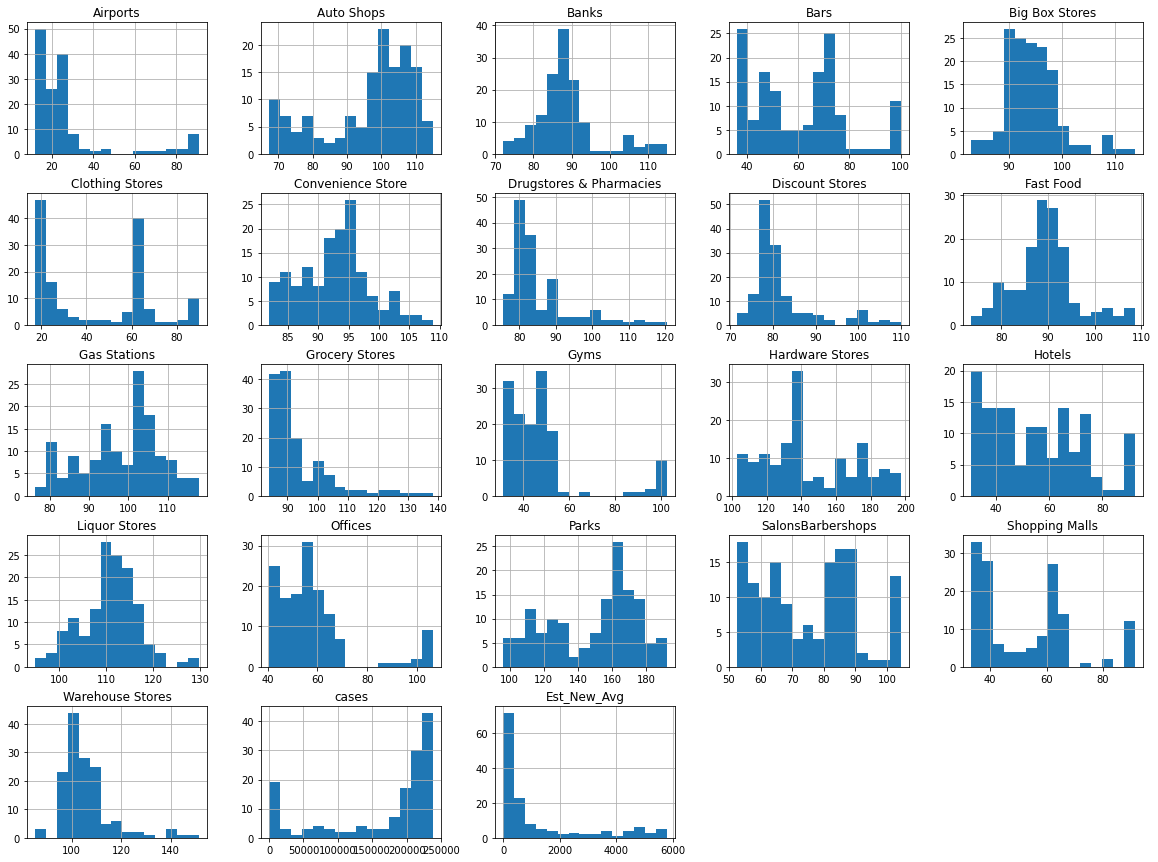

In [21]:
# Histograms
df.hist(bins = 15, figsize = (20, 15))
plt.show()

In [22]:
# Correlation
corr_matrix = df.corr()
corr_matrix["Est_New_Avg"].sort_values(ascending = False)

Est_New_Avg                1.000000
Grocery Stores             0.496115
Drugstores & Pharmacies    0.362379
Warehouse Stores           0.081448
Big Box Stores            -0.007856
Discount Stores           -0.197259
Airports                  -0.200908
Liquor Stores             -0.336481
Banks                     -0.342148
Hardware Stores           -0.412314
Gyms                      -0.448837
Offices                   -0.485488
Shopping Malls            -0.529671
cases                     -0.541834
Convenience Store         -0.576925
Parks                     -0.578729
Clothing Stores           -0.591412
SalonsBarbershops         -0.631795
Fast Food                 -0.663907
Hotels                    -0.672628
Bars                      -0.674236
Gas Stations              -0.814875
Auto Shops                -0.885873
Name: Est_New_Avg, dtype: float64

In [23]:
# Absolute Value
abs(corr_matrix["Est_New_Avg"]).sort_values(ascending = False)

Est_New_Avg                1.000000
Auto Shops                 0.885873
Gas Stations               0.814875
Bars                       0.674236
Hotels                     0.672628
Fast Food                  0.663907
SalonsBarbershops          0.631795
Clothing Stores            0.591412
Parks                      0.578729
Convenience Store          0.576925
cases                      0.541834
Shopping Malls             0.529671
Grocery Stores             0.496115
Offices                    0.485488
Gyms                       0.448837
Hardware Stores            0.412314
Drugstores & Pharmacies    0.362379
Banks                      0.342148
Liquor Stores              0.336481
Airports                   0.200908
Discount Stores            0.197259
Warehouse Stores           0.081448
Big Box Stores             0.007856
Name: Est_New_Avg, dtype: float64

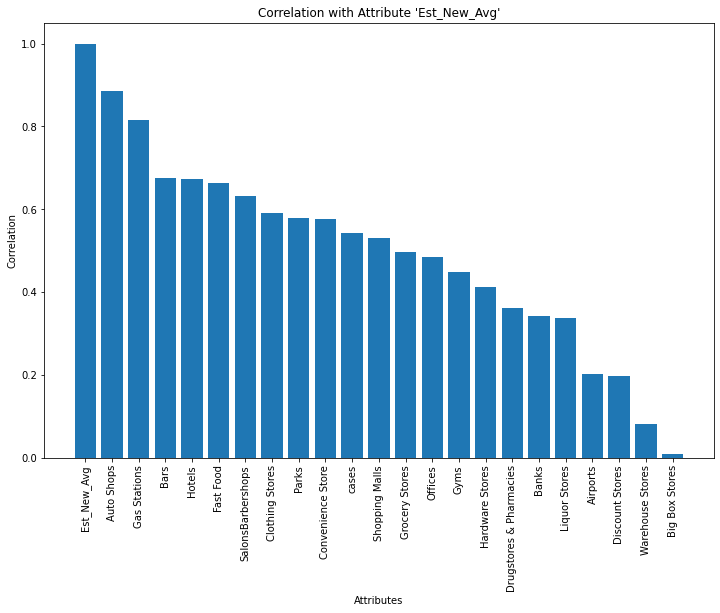

In [24]:
# Visualize
plt.figure(figsize = (12, 8))
plt.xticks(rotation = 90)
plt.ylabel("Correlation")
plt.xlabel("Attributes")
plt.bar(abs(corr_matrix["Est_New_Avg"]).sort_values(ascending = False).index, 
        abs(corr_matrix["Est_New_Avg"]).sort_values(ascending = False))
plt.title("Correlation with Attribute 'Est_New_Avg'")
plt.show()

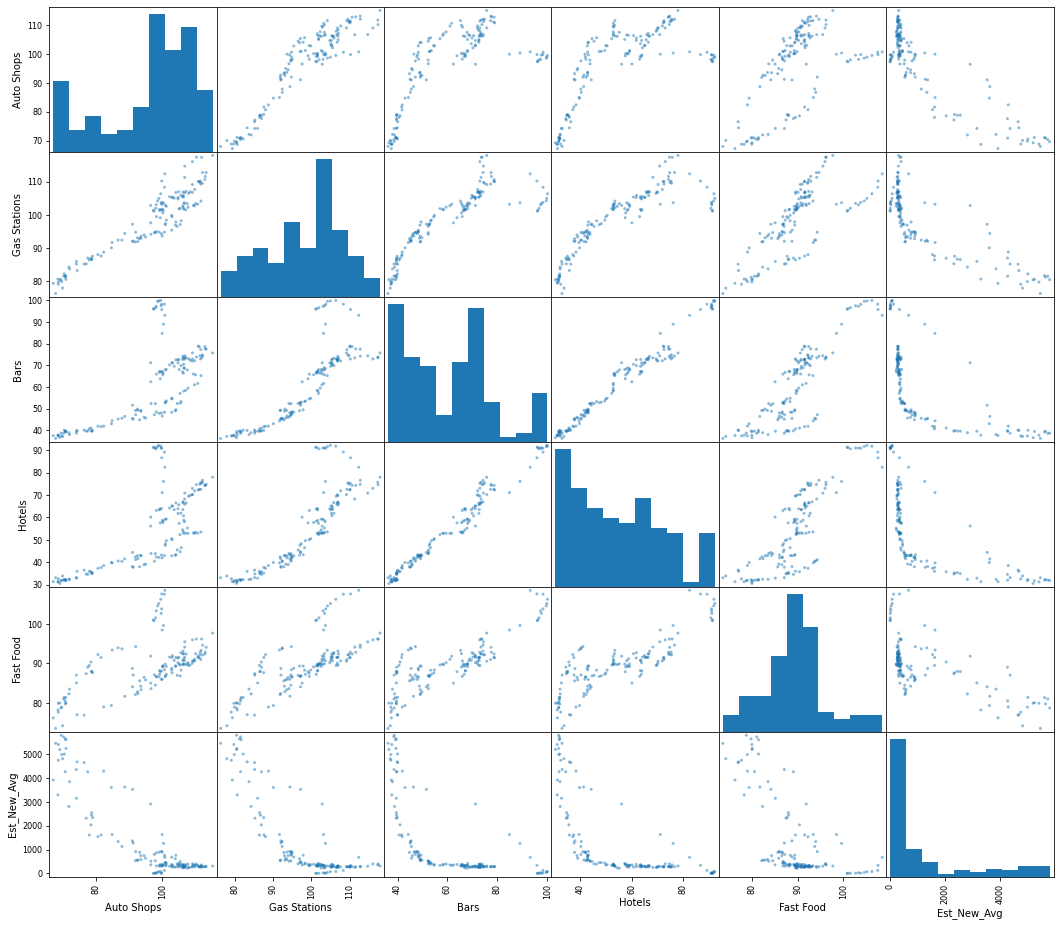

In [25]:
# Visualize scatter matrix with top 5 attribute （Negative correlation)
   
attributes_neg = ["Auto Shops", "Gas Stations", "Bars", "Hotels", "Fast Food", "Est_New_Avg"]
from pandas.plotting import scatter_matrix

scatter_matrix(df[attributes_neg], figsize = (18, 16))
plt.show()

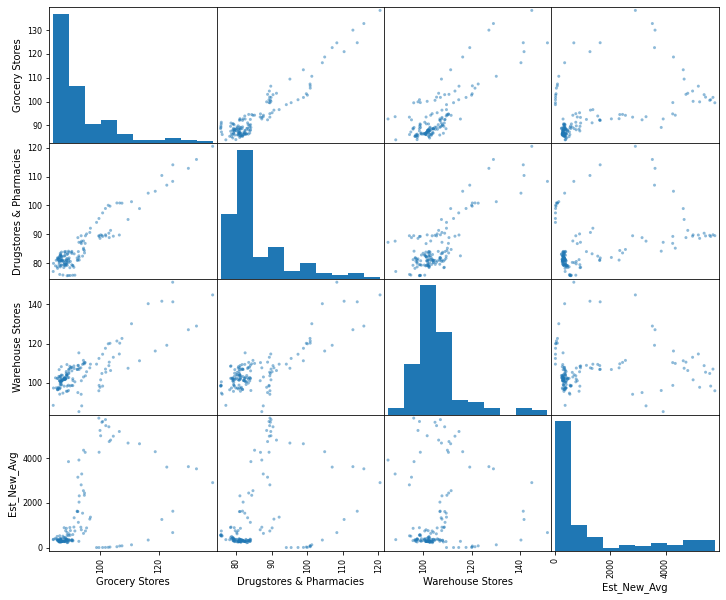

In [26]:
# Visualize scatter matrix（positive correlation)
attributes_pos = ["Grocery Stores", "Drugstores & Pharmacies", "Warehouse Stores", "Est_New_Avg"]

scatter_matrix(df[attributes_pos], figsize = (12, 10))
plt.show()

# Prepare the Data for Machine Learning

In [27]:
# Set fearues and label
X = train_set.drop("Est_New_Avg", axis = 1)
y = train_set["Est_New_Avg"].copy()

In [28]:
# Build pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "mean")),
    ("std_scaler", MinMaxScaler())
])

In [29]:
# Transform training dataset
X = pipeline.fit_transform(X)

# Select and Train a Model

## Individual Learning

In [30]:
# Import packages

# Linear
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Support Vector Machine
from sklearn.svm import SVR

# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# KNN
from sklearn.neighbors import KNeighborsRegressor

# Models
regressors = {
    "Linear": LinearRegression(),
    "Stochastic Gradient Descent": SGDRegressor(),
    "Ridge Regressor": Ridge(),
    "Lasso Regressor": Lasso(),
    "Elastic Net": ElasticNet(l1_ratio = 0.5),
    "SVM": SVR(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "K Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Initially use cross-validation for model selection
from sklearn.model_selection import cross_val_score

# Build a funtion for cross validation
def cross_validation_reg(key, model):
    model.fit(X, y)
    score_acc = cross_val_score(model, X, y, cv = 10)
    print("---------------------------------------------")
    print("The Accuracy of ", key, "is", str(round(score_acc.mean() * 100, 2)) + "%")
    score_mse = cross_val_score(model, X, y, cv = 10, scoring = "neg_root_mean_squared_error")
    rmse = -score_mse
    print("The Average RMSE of ", key, "is", round(rmse.mean(),2))
    
for key, model in regressors.items():
    cross_validation_reg(key, model)

---------------------------------------------
The Accuracy of  Linear is 92.27%
The Average RMSE of  Linear is 368.66
---------------------------------------------
The Accuracy of  Stochastic Gradient Descent is 90.16%
The Average RMSE of  Stochastic Gradient Descent is 461.57
---------------------------------------------
The Accuracy of  Ridge Regressor is 90.78%
The Average RMSE of  Ridge Regressor is 445.85
---------------------------------------------
The Accuracy of  Lasso Regressor is 94.32%
The Average RMSE of  Lasso Regressor is 347.93
---------------------------------------------
The Accuracy of  Elastic Net is 55.76%
The Average RMSE of  Elastic Net is 1024.39
---------------------------------------------
The Accuracy of  SVM is -29.51%
The Average RMSE of  SVM is 1803.31
---------------------------------------------
The Accuracy of  Decision Tree Regressor is 94.52%
The Average RMSE of  Decision Tree Regressor is 379.17
---------------------------------------------
The Accur

### Pick the best performance model in different algorithms for fine-tuning:
- SVD: LinearRegression
- Stochastic Gradient Descent: Lasso
- Support Vector Machine: SVM
- Decision Tree
- K Nearest Neighbors

In [31]:
# Set parameteres
param_lasso = {
    "alpha": [1,3, 5, 7, 9, 11]
}

param_SVM = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [3500, 3700, 3900, 4000, 3950, 4200, 4300],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    
    ]

param_tree = {
    "criterion":["mse", "mae"],
    "max_depth": np.arange(1,10),
    "min_samples_split": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [3, 4, 5]}

param_knn = {
    "n_neighbors":[1, 2, 3, 4]
}

In [32]:
# Fit the dataset
from sklearn.model_selection import GridSearchCV

grid_search_lasso = GridSearchCV(Lasso(), 
                                 param_lasso,
                                 cv = 5,
                                 scoring = "neg_root_mean_squared_error",
                                 return_train_score=True)
grid_search_lasso.fit(X,y)

lasso_final = grid_search_lasso.best_estimator_

grid_search_SVM = GridSearchCV(SVR(), 
                               param_SVM,
                               cv = 5,
                               scoring = "neg_root_mean_squared_error",
                               return_train_score=True)
grid_search_SVM.fit(X,y)

SVM_final = grid_search_SVM.best_estimator_

grid_search_tree = GridSearchCV(DecisionTreeRegressor(), 
                                param_tree,
                                cv = 5,
                                scoring = "neg_root_mean_squared_error",
                                return_train_score=True)
grid_search_tree.fit(X,y)

tree_final = grid_search_tree.best_estimator_

grid_search_knn = GridSearchCV(KNeighborsRegressor(), 
                                param_knn,
                                cv = 5,
                                scoring = "neg_root_mean_squared_error",
                                return_train_score=True)
grid_search_knn.fit(X,y)

knn_final = grid_search_knn.best_estimator_

In [33]:
# Best model
regressors_tuned = {
    "Lasso Regressor": lasso_final,
    "SVM": SVM_final,
    "Decision Tree Regressor" : tree_final,
    "K Nearest Neighbors": knn_final
}

### Learning Curves

In [34]:
# Build a function to plot learning curves
from sklearn.metrics import mean_squared_error
def plot_learning_curves(model, X, y):
    model_plot = model
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model_plot.fit(X_train[:m], y_train[:m])
        y_train_predict = model_plot.predict(X_train[:m])
        y_val_predict = model_plot.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = "Validation")
    plt.xlabel("Training Instances")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve of " + str(model))
    
def plot_learning_curves_knn(model, X, y):
    model_plot = model
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(2, len(X_train)):
        model_plot.fit(X_train[:m], y_train[:m])
        y_train_predict = model_plot.predict(X_train[:m])
        y_val_predict = model_plot.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 2, label = "Validation")
    plt.xlabel("Training Instances")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curve of " + str(model))

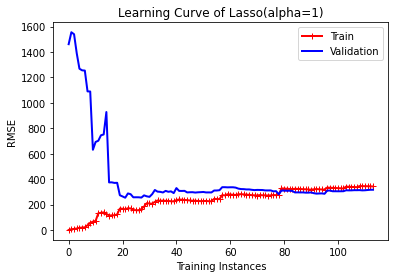

In [35]:
# Plot learning curves - Lasso Regression
plot_learning_curves(lasso_final, X, y)

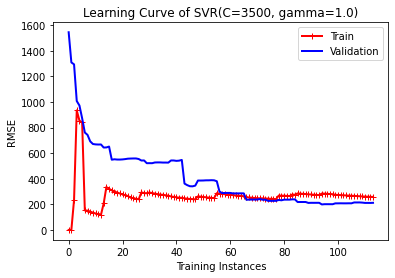

In [36]:
# Plot learning curves - SVM Regression
plot_learning_curves(SVM_final, X, y)

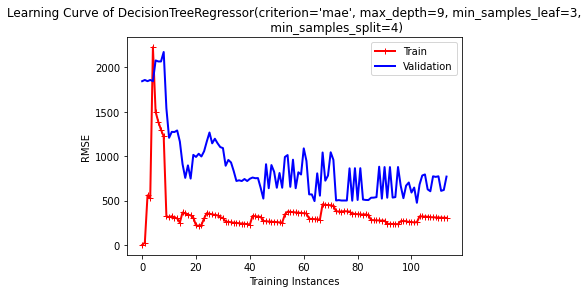

In [37]:
# Plot learning curves - Decision Tree Regression
plot_learning_curves(tree_final, X, y)

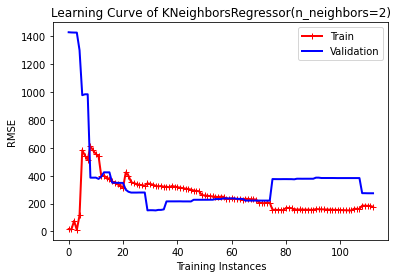

In [38]:
# Plot learning curves - K Nearest Neighbors Regression
plot_learning_curves_knn(knn_final, X, y)

### Cross Validation

In [39]:
# Cross validation
for key, model in regressors_tuned.items():
    cross_validation_reg(key, model)

---------------------------------------------
The Accuracy of  Lasso Regressor is 94.32%
The Average RMSE of  Lasso Regressor is 347.93
---------------------------------------------
The Accuracy of  SVM is 95.99%
The Average RMSE of  SVM is 294.22
---------------------------------------------
The Accuracy of  Decision Tree Regressor is 81.47%
The Average RMSE of  Decision Tree Regressor is 460.9
---------------------------------------------
The Accuracy of  K Nearest Neighbors is 95.29%
The Average RMSE of  K Nearest Neighbors is 267.15


## Ensemble Learning

In [40]:
# Import packages

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Voting
from sklearn.ensemble import VotingRegressor

# Adaboost
from sklearn.ensemble import AdaBoostRegressor

# Bagging
from sklearn.ensemble import BaggingRegressor

# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor


### Random Forest

In [41]:
# Run initially
cross_validation_reg("Random Forest", RandomForestRegressor())

---------------------------------------------
The Accuracy of  Random Forest is 92.83%
The Average RMSE of  Random Forest is 338.61


In [42]:
# Fine-tuning
param_forest = [
    {"n_estimators": [200], 
     "max_features": [5, 10, 15, 20],
     "max_depth": [5]},
    {"bootstrap": [False],
     "n_estimators": [200], 
     "max_features": [5, 10, 15, 20],
     "max_depth": [5]}]

grid_search_forest = GridSearchCV(RandomForestRegressor(), 
                                  param_forest,
                                  cv = 5,
                                  scoring = "neg_root_mean_squared_error",
                                  return_train_score=True)
grid_search_forest.fit(X,y)

forest_final = grid_search_forest.best_estimator_

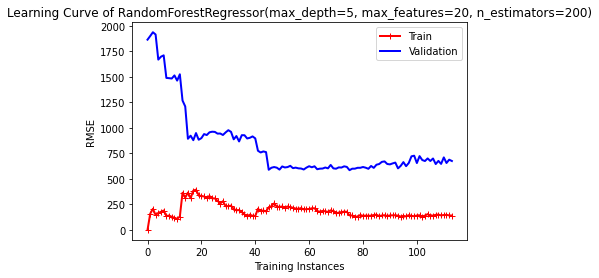

In [43]:
# Learning curves
plot_learning_curves(forest_final, X, y)

In [44]:
# Cross validation
cross_validation_reg("Random Forest", forest_final)

---------------------------------------------
The Accuracy of  Random Forest is 93.11%
The Average RMSE of  Random Forest is 338.69


### Voting

In [45]:
voting_reg = VotingRegressor(
    estimators = [("SVM", SVM_final),
                  ("Knn", knn_final)],
    n_jobs = -1)

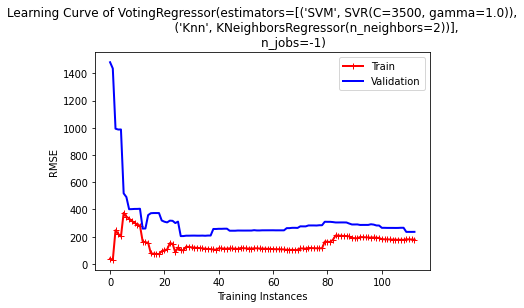

In [46]:
# Learning curves
plot_learning_curves_knn(voting_reg, X, y)

In [47]:
# Cross validation
cross_validation_reg("Voting", voting_reg)

---------------------------------------------
The Accuracy of  Voting is 96.17%
The Average RMSE of  Voting is 266.42


### Adaboost

In [48]:
# Run initially
cross_validation_reg("Adaboost", AdaBoostRegressor())

---------------------------------------------
The Accuracy of  Adaboost is 92.8%
The Average RMSE of  Adaboost is 380.36


In [49]:
# Fine-tuning
param_adaboosting = {"base_estimator": [voting_reg],
                     "n_estimators": [49, 50, 51],
                     "loss": ["linear", "square", "exponential"],
                     "random_state": [42]}

grid_search_adaboosting = GridSearchCV(AdaBoostRegressor(), 
                                       param_adaboosting,
                                       cv = 5,
                                       scoring = "neg_root_mean_squared_error",
                                       return_train_score=True)
grid_search_adaboosting.fit(X, y)

adaboost_final = grid_search_adaboosting.best_estimator_

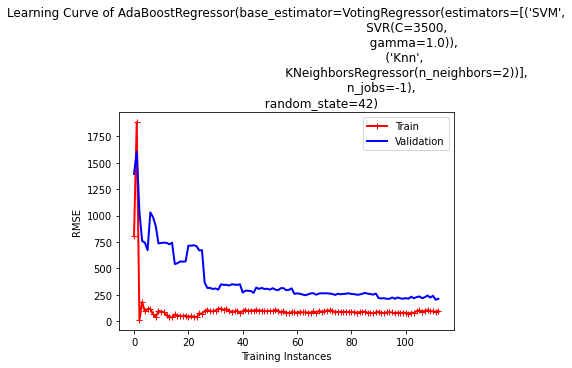

In [50]:
# Plot learning curves
plot_learning_curves_knn(adaboost_final, X, y)

In [51]:
# Cross validation
cross_validation_reg("Adaboost", adaboost_final)

---------------------------------------------
The Accuracy of  Adaboost is 96.38%
The Average RMSE of  Adaboost is 270.63


### Gradient Boosting - GBRT

In [52]:
# Run initially
cross_validation_reg("GBRT", GradientBoostingRegressor())

---------------------------------------------
The Accuracy of  GBRT is 95.18%
The Average RMSE of  GBRT is 309.93


In [53]:
# Find optimal number of trees
X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth = 4, n_estimators = 300)
gbrt.fit(X_train, y_train)

errors = []
for y_pred  in gbrt.staged_predict(X_val):
    errors.append(mean_squared_error(y_val, y_pred))
best_n_estimators = np.argmin(errors) + 1

# Fine-tuning
param_gbrt = {"loss": ["ls", "lad", "huber"],
              "learning_rate": [0.01, 0.1, 1, 1.5],
              "max_depth": [2, 3, 4],
              "n_estimators":[best_n_estimators]}

grid_search_gbrt = GridSearchCV(GradientBoostingRegressor(), 
                                       param_gbrt,
                                       cv = 5,
                                       scoring = "neg_root_mean_squared_error",
                                       return_train_score=True)
grid_search_gbrt.fit(X, y)

gbrt_final = grid_search_gbrt.best_estimator_

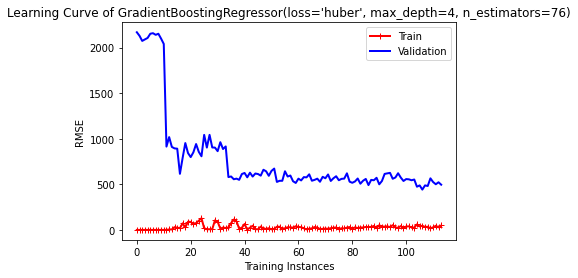

In [54]:
# Plot learning curves - GBRT
plot_learning_curves(gbrt_final, X, y)

In [55]:
# Cross validation
cross_validation_reg("GBRT", gbrt_final)

---------------------------------------------
The Accuracy of  GBRT is 95.74%
The Average RMSE of  GBRT is 289.1


# Evaluate on the Test Set

In [56]:
# Split features and labels and scaling

X_test = test_set.drop("Est_New_Avg", axis = 1)
y_test = test_set["Est_New_Avg"].copy()

X_test = pipeline.fit_transform(X_test)

# Identify final models
final_models = [voting_reg, adaboost_final]

# Check RMSE on test dataset
for model in final_models:
    model.fit(X, y)
    y_pred = model.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
    print("The RMSE of is ", str(round(rmse_test, 2)))

The RMSE of is  303.58
The RMSE of is  290.87


In [57]:
# Check MAE on test set
from sklearn.metrics import mean_absolute_error
for model in final_models:
    model.fit(X, y)
    y_pred = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred)
    print("The MAE of is ", str(round(mae_test, 2)))

The MAE of is  198.49
The MAE of is  195.51


#### Adaboost_final will be select to deploy, since it got lowest RMSE and MAE.

In [58]:
# Comparing the difference between actual value with predicted value
y_pred = adaboost_final.predict(X_test)
test_compare_predict = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Error": y_pred - y_test})
test_compare_predict

,Actual,Predicted,Error
19,3617.0,3155.828184,-461.171816
42,4466.0,3798.178230,-667.821770
153,326.0,325.705151,-0.294849
78,808.0,788.668614,-19.331386
145,270.0,312.585477,42.585477
15,2196.0,1857.426843,-338.573157
24,4199.0,4301.099792,102.099792
68,1039.0,969.635063,-69.364937
113,350.0,324.114198,-25.885802
118,394.0,322.619863,-71.380137


In [59]:
# MAE on test set
from sklearn.metrics import mean_absolute_error
mae_test = mean_absolute_error(y_test, y_pred)
mae_test

195.5129812285675

(-300.0, 6300.0, -300.0, 6300.0)

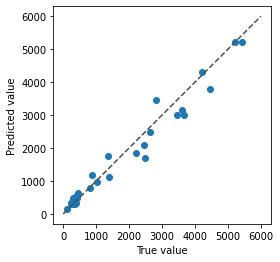

In [60]:
g = plt.scatter(y_test, y_pred)
plt.plot([0,6000],[0,6000],ls='--', c = '.3')
g.axes.set_xlabel ('True value')
g.axes.set_ylabel ('Predicted value')
g.axes.axis('equal')
g.axes.axis('square')

array([[<AxesSubplot:title={'center':'Actual'}>,
        <AxesSubplot:title={'center':'Predicted'}>]], dtype=object)

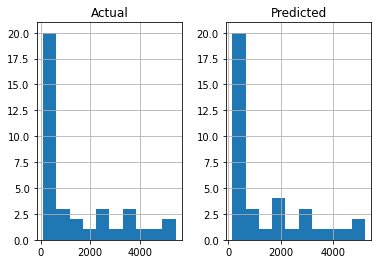

In [61]:
# Histogram comparision between actual value and predicted value
test_compare_predict[["Actual","Predicted"]].hist()

In [62]:
# Desciptive statistics of bias
test_compare_predict["Error"].describe()

count     37.000000
mean     -55.266785
std      289.510652
min     -772.930854
25%     -157.867098
50%       16.461379
75%       83.382356
max      631.618681
Name: Error, dtype: float64

<AxesSubplot:>

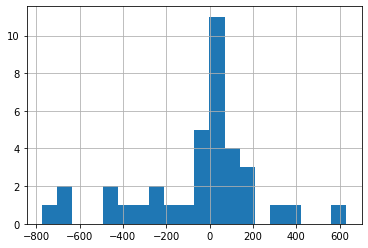

In [63]:
# Histogram of bias
test_compare_predict["Error"].hist(bins = 20)

<AxesSubplot:xlabel='Error', ylabel='Density'>

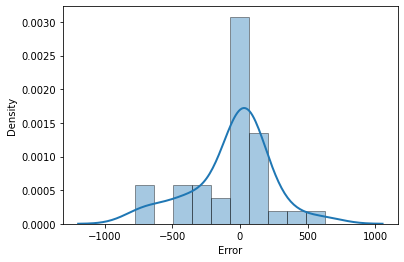

In [64]:
# Density Plot and Histogram of bias
sns.distplot(test_compare_predict["Error"], 
             hist=True, 
             kde=True,  
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

In [65]:
# Compute 95% confidence interval of bias
import scipy.stats
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m+h

mean_confidence_interval(test_compare_predict["Error"], confidence=0.95)

(-151.79444206620144, 41.26087264287357)

# Feature Importance Analysis - Based on Random Forest Algorithm

In [66]:
# Check the feature importance based on the Random Forest Model
feature_importances = grid_search_forest.best_estimator_.feature_importances_
feature_importances = sorted(zip(feature_importances, train_set.columns), reverse = True)
feature_importances

[(0.5103452343490658, 'Auto Shops'),
 (0.1371409054177012, 'Fast Food'),
 (0.1137336446566556, 'Gas Stations'),
 (0.08670143217751937, 'Bars'),
 (0.033197118451862725, 'Grocery Stores'),
 (0.031014251601177115, 'cases'),
 (0.015749048548348403, 'Hotels'),
 (0.010849682077471305, 'Drugstores & Pharmacies'),
 (0.009598023274772022, 'Hardware Stores'),
 (0.007383553850845529, 'Liquor Stores'),
 (0.007037614864372239, 'Airports'),
 (0.006546415665542745, 'Big Box Stores'),
 (0.006122467016691902, 'Discount Stores'),
 (0.005290915980582974, 'Convenience Store'),
 (0.0031613598055694773, 'Warehouse Stores'),
 (0.003063306245710697, 'Shopping Malls'),
 (0.0030223761057078945, 'SalonsBarbershops'),
 (0.0028840833837240902, 'Gyms'),
 (0.0028766903568472574, 'Offices'),
 (0.0022486621945237138, 'Clothing Stores'),
 (0.0010166643387781466, 'Banks'),
 (0.001016549636529816, 'Parks')]

Text(0.5, 1.0, 'Feature Importance Score')

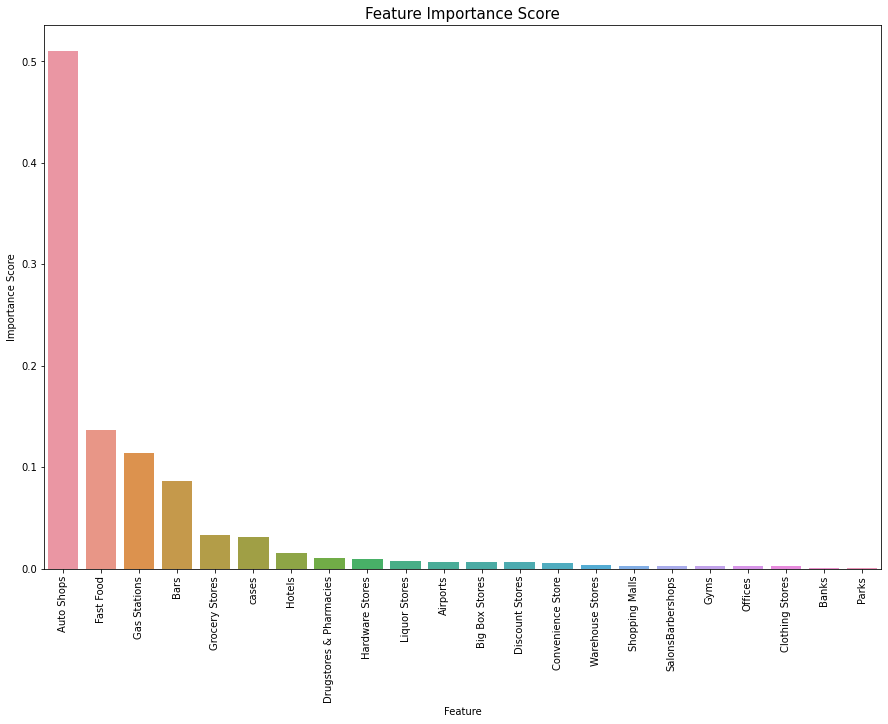

In [74]:
# Visualize
feature_importances = pd.DataFrame(feature_importances, columns = ["Importance Score", "Feature"])
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90)
ax = sns.barplot(x="Feature", y="Importance Score", data = feature_importances)
plt.title("Feature Importance Score", fontsize = 15)

# Full Pipeline

In [68]:
# Build full pipeline including data preparation and predition
full_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "mean")),
    ("std_scaler", MinMaxScaler()),
    ("adaboost_final", adaboost_final)
])

# Save Finalised Model to Current Working Directory

In [69]:
# Get current working directory
import os
cwd = os.getcwd()

In [70]:
# save as pickle
import pickle
pickle.dump(full_pipeline, open("model.pkl", "wb"))